In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
from scipy import integrate as ig
from scipy.interpolate import interp1d
from functions import J0, J0_rad, SQ, Voc_rad, LED_QE, calculate_summary, Vloss_CT, Vloss_SQ
from utils import bb, getAM15, linear, set_up_plot

In [2]:
os.getcwd()

'/home/jungbluth/Desktop/git/Voltage-Loss-Calculations'

In [3]:
T = 293 # [K] ambient & cell temperature
h = 6.626 * 10**(-34) # [kgm^2/s]
h_eV = 4.1357*10**(-15) # eV s
c = 2.998 * 10**(8) # [m/s]
k = 1.3806 * 10**(-23) # [kgm^2/s^2K]
k_eV = 8.6173*10**(-5) # eV / K
q = 1.60217662 * 10**(-19) # [C]
q_eV = 1
Vth = k_eV*T/q_eV # thermal voltage [eV]

### Import sEQE Data

#### (Replace and read in from file !!!)

In [4]:
ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR46_D_5_ZnPc_C60_2')
ZnPc_25 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR45_D_25_ZnPc_C60_5')
ZnPc_50 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR39_C_50_ZnPc_C60_4')
ZnPc_75 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR45_A_75_ZnPc_C60_4')
ZnPc_95 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR61_D_95_ZnPc_C60_5')
ZnPc_100 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR61_A_100_ZnPc_5')

In [5]:
F4ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR40_B_5_F4ZnPc_C60_2')
F4ZnPc_25 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR41_B_25_F4ZnPc_C60_2')
F4ZnPc_50 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR40_A_50_F4ZnPc_C60_5')
#F4ZnPc_75 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR41_C_75_F4ZnPc_C60_4')
F4ZnPc_75 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR41_A_75_F4ZnPc_C60_5')
F4ZnPc_95 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR66_B_95_F4ZnPc_C60_2')
F4ZnPc_100 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR66_C_100_F4ZnPc_2')

In [6]:
# F8ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR55_D_5_F8ZnPc_C60_5')
F8ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR72_D_5_F8ZnPc_C60_1_(0.5TC)')
F8ZnPc_25 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR43_D_25_F8ZnPc_C60_1')
F8ZnPc_50 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR42_C_50_F8ZnPc_C60_7')
F8ZnPc_75 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR43_A_75_F8ZnPc_C60_4')
F8ZnPc_95 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR56_B_95_F8ZnPc_C60_5')
F8ZnPc_100 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR56_C_100_F8ZnPc_8')

In [7]:
# F16ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR50_A_5_F16ZnPc_C60_5')
F16ZnPc_5 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR71_B_5_F16ZnPc_C60_2 (2)')
F16ZnPc_25 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR44_D_25_F16ZnPc_C60_1')
F16ZnPc_50 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR50_D_50_F16ZnPc_C60_7')
F16ZnPc_75 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR57_C_75_F16ZnPc_C60_7')
F16ZnPc_95 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR58_D_95_F16ZnPc_C60_1')
#F16ZnPc_100 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR58_A_100_F16ZnPc_5')
F16ZnPc_100 = pd.read_csv('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_sEQE/sEQE_analysis/Measurements_RT/DR72_A_100_F16ZnPc_1_(0.5TC)')

In [8]:
parameters = pd.read_excel('/home/jungbluth/Desktop/ZnPc_Data/FxZnPc_Voltage/Voltage_analysis/5_FxZnPc_Summary.xlsx')
parameters.head()

,Material,Number,Voc (V),Err_Voc (V),Jsc (mA/cm2),Err_Jsc (mA/cm2),FF,Err_FF,ECT (eV),Err_ECT (eV),...,Err_Eopt (eV),l (eV),Err_l (eV),f (eV2),Err_f (eV2),T1_exp (eV),T1_calc (eV),EQE File,Best_Voc,Best_Jsc
0,ZnPc,19,0.78,0.02,3.56,0.17,0.40,0.01,1.38,0.01,...,0.01,0.199,0.01,0.004235,0.001388,1.13,1.21,DR46_D_5_ZnPc_C60_2,0.76,3.74
1,F4ZnPc,13,0.89,0.02,3.10,0.17,0.33,0.01,1.45,0.01,...,0.01,0.136,0.03,0.000794,0.000506,1.13,1.20,DR40_B_5_F4ZnPc_C60_2,0.88,3.36
2,F8ZnPc,12,1.14,0.02,1.02,0.05,0.30,0.01,1.59,0.01,...,0.01,0.151,0.01,0.000097,0.000019,NaN,1.25,DR72_D_5_F8ZnPc_C60_1_(0.5TC),1.14,1.09
3,F16ZnPc,15,1.21,0.02,0.82,0.05,0.29,0.01,1.61,0.01,...,0.01,0.159,0.01,0.000035,NaN,NaN,1.18,DR71_B_5_F16ZnPc_C60_2 (2),1.24,0.87
4,C60,11,1.13,0.07,1.08,0.08,0.30,0.01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.50,NaN,DR39_D_C60_2,1.26,0.99


### Calculate Relevant Parameters

#### Pull out relevant parameters

In [9]:
columns = parameters['EQE File'][:-1]
samples = [ZnPc_5, F4ZnPc_5, F8ZnPc_5, F16ZnPc_5]

EIP = [1.75, 1.68, 1.78, 1.71] # from inflection point
Voc = parameters['Voc (V)'][:-1]
Jsc = parameters['Jsc (mA/cm2)'][:-1]
ECT = parameters['ECT (eV)'][:-1]
f = parameters['f (eV2)'][:-1]
l = parameters['l (eV)'][:-1]

In [10]:
summary = calculate_summary(columns, samples, Voc, Jsc, ECT, EIP, f, l)
summary
# summary.to_csv('/home/jungbluth/Desktop/Voc_Loss_comparison')

,Sample,Voc [V],ECT [V],Jsc [mA/cm2],"Voc,SQ [V]","Voc,rad [V]","Delta Voc,SC [V] (Rau)","Delta Voc,rad [V] (Rau)","Delta Voc,nonrad [V] (Rau)","Voc,rad [V] (CT properties)","Delta Voc,rad [V] (CT properties)",LED QE,J0 [mA/cm2],"J0,rad [mA/cm2]",J0 (CT properties) [mA/cm2]
0,DR46_D_5_ZnPc_C60_2,0.78,1.38,3.56,1.473443,1.143944,0.044832,0.284667,0.363944,1.127264,0.252736,5.491917e-07,1.363012e-13,7.485547e-20,2.642582e-13
1,DR40_B_5_F4ZnPc_C60_2,0.89,1.45,3.10,1.406645,1.239143,0.050652,0.116851,0.349143,1.233344,0.216656,9.870037e-07,1.521519e-15,1.501744e-21,1.917339e-15
2,DR72_D_5_F8ZnPc_C60_1_(0.5TC),1.14,1.59,1.02,1.501703,1.386659,0.075308,0.039735,0.246659,1.396065,0.193935,5.716851e-05,2.507328e-20,1.433402e-24,1.730546e-20
3,DR71_B_5_F16ZnPc_C60_2 (2),1.21,1.61,0.82,1.434923,1.335010,0.083265,0.016648,0.125010,1.436082,0.173918,7.074156e-03,1.259910e-21,8.912799e-24,2.304384e-23


### Modelled EQE

In [11]:
l_CT = 0.199 # [eV]
f_CT = 0.004235 # [eV**2]
E_CT = 1.383 # [eV]
l_opt = 0.136 # [eV]
f_opt = 0.032461 # [eV**2]
E_opt = 1.675 # [eV]

In [12]:
def Marcus_Gaussian(E_, E_CT, l_CT, f_CT, E_opt, l_opt, f_opt, T):
    """
    :param E_: list of energy values [list of floats]
    :param ECT: CT state value [float]
    :param l: reorganization energy [float]
    :param f: Oscillation strength [float]
    """
    gaussian_CT = [f_CT/(E*np.sqrt(4*np.pi*l_CT*k_eV*T))*np.exp(-(E_CT+l_CT-E)**2 / (4*l_CT*k_eV*T)) for E in E_]
    gaussian_opt = [f_opt/(E*np.sqrt(4*np.pi*l_opt*k_eV*T))*np.exp(-(E_opt+l_opt-E)**2 / (4*l_opt*k_eV*T)) for E in E_]
    gaussian_sum = [f_CT/(E*np.sqrt(4*np.pi*l_CT*k_eV*T))*np.exp(-(E_CT+l_CT-E)**2 / (4*l_CT*k_eV*T)) + f_opt/(E*np.sqrt(4*np.pi*l_opt*k_eV*T))*np.exp(-(E_opt+l_opt-E)**2 / (4*l_opt*k_eV*T)) for E in E_]
    
    return np.array(gaussian_CT), np.array(gaussian_opt), np.array(gaussian_sum)

In [13]:
# energy = ZnPc_5['Energy']
energy = np.arange(1, 2.3, 0.01)

In [14]:
gaussian_CT, gaussian_opt, gaussian_sum = Marcus_Gaussian(energy, E_CT, l_CT, f_CT, E_opt, l_opt, f_opt, 300)

(1e-05, 0.8)

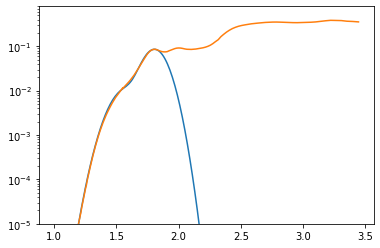

In [15]:
plt.semilogy(energy, gaussian_sum)
plt.semilogy(ZnPc_5['Energy'], ZnPc_5['EQE'])
plt.ylim(10E-6, 0.8)

In [16]:
modelled_df = pd.DataFrame()
modelled_df['Energy'] = energy
modelled_df['EQE'] = gaussian_sum

E = ZnPc_5['Energy']
bb_df = bb(energy)

In [17]:
# Limit of saturation current density based on CT properties
def J0_CT_opt(EQE_EL, E_CT, l_CT, f_CT, E_opt, l_opt, f_opt):
    """
    Function to calculate the limit of the saturation current density (J0) based on CT properties as defined by Koen Vandewal
    :param EQE_EL: LED quantum efficiency (unitless) [float]
    :param ECT: CT state energy(eV) [float]
    :param l: Reorganization energy (eV) [float]
    :param f: Oscillator strength (eV**2) [float]
    :return: J0: limit of the saturation current density [float]
    """
    a_CT = np.sqrt(4*np.pi*l_CT*k_eV*T)*np.exp(-(E_CT + l_CT)**2 / (4*l_CT*k_eV*T))
    a_CT = 0
    b_CT = 2*np.pi*(E_CT-l_CT)*np.exp(-(E_CT/(k_eV*T)))
    J0_CT = (q/(10*EQE_EL))*f_CT/(h_eV**3 * c**2)*(a_CT + b_CT)
    
    
    a_opt = np.sqrt(4*np.pi*l_opt*k_eV*T)*np.exp(-(E_opt + l_opt)**2 / (4*l_opt*k_eV*T))
    a_opt = 0
    b_opt = 2*np.pi*(E_opt-l_opt)*np.exp(-(E_opt/(k_eV*T)))
    J0_opt = (q/(10*EQE_EL))*f_opt/(h_eV**3 * c**2)*(a_opt+b_opt)
    
    J0_sum = J0_CT + J0_opt
    
    return J0_CT, J0_opt, J0_sum

In [18]:
J0_rad_standard = J0_rad(modelled_df, bb_df)
J0_standard = J0(modelled_df, bb_df, summary['LED QE'][0])
J0_CT, J0_opt, J0_sum = J0_CT_opt(summary['LED QE'][0], E_CT, l_CT, f_CT, E_opt, l_opt, f_opt)

In [19]:
print('J0,rad: ', J0_rad_standard)
print('J0,standard: ', J0_standard)
print('J0,CT: ', J0_CT)
print('J0,opt: ', J0_opt)
print('J0,sum: ', J0_sum)

J0,rad:  1.532668937378542e-19
J0,standard:  2.7907723389550815e-13
J0,CT:  2.3524922861007155e-13
J0,opt:  2.224982715136898e-17
J0,sum:  2.3527147843722293e-13


In [28]:
Voc(summary['Jsc [mA/cm2]'][0], J0_standard)

0.7619309092892448

In [29]:
Voc(summary['Jsc [mA/cm2]'][0], J0_CT)

0.7662444727828206

In [30]:
Vloss_CT(summary['Jsc [mA/cm2]'][0], E_CT, f_CT, l_CT)

(1.1301997375428718, 0.25280026245712806)

In [31]:
def Voc_CT(EQE_EL, Jsc, ECT, f, l, T=300):
    return (ECT/q_eV)+(k_eV*T/q_eV)*np.log((10*Jsc*h_eV**3*c**2)/(f*q*2*np.pi*(ECT-l)))+(k_eV*T)/q_eV * np.log(EQE_EL)

In [32]:
Voc_CT(summary['LED QE'][0], summary['Jsc [mA/cm2]'][0], E_CT, f_CT, l_CT)

0.7515096990950365

In [33]:
def Voc_CT_opt_test(EQE_EL, Jsc, E_CT, f_CT, l_CT, E_opt, f_opt, l_opt, T=300):
    return (k_eV*T/q_eV)*np.log((10*Jsc*h_eV**3*c**2)/(2*np.pi*q*(f_CT*(E_CT-l_CT)*np.exp(-E_CT/(k_eV*T))+f_opt*(E_opt-l_opt)*np.exp(-E_opt/(k_eV*T))))) + k_eV*T/q_eV * np.log(EQE_EL)

In [34]:
Voc_CT_opt_test(summary['LED QE'][0], summary['Jsc [mA/cm2]'][0], E_CT, f_CT, l_CT, E_opt, f_opt, l_opt)

0.7515064968251479

In [35]:
Voc_rad(summary['Voc [V]'][0],summary['Jsc [mA/cm2]'][0],J0_rad_standard)

(1.1258505712450404, 0.3458505712450404)

In [91]:
# Limit of saturation current density
def J0_(EQE_df, phi_bb_df, EQE_EL):
    """
    Function to calculate the limit of the saturation current density (J0)
    :param EQE_df: dataFrame of EQE spectra, with columns 'Energy' and 'EQE' [dataFrame of floats]
    :param phi_bb_df: dataFrame of black-body spectrum, with columns 'Energy' and 'Phi' [dataFrame of floats]
    :param EQE_EL: LED quantum efficiency [float]
    :return: J0: limit of the saturation current density [float]
    """
    
    EQE_intp = interp1d(EQE_df['Energy'].values, EQE_df['EQE'].values)
    Phi_intp = interp1d(phi_bb_df['Energy'].values, phi_bb_df['Phi'].values)    

    J0_list = []
    for n in range(0,len(EQE_df['Energy'])-1):
        j0 = (q/EQE_EL)*EQE_df['EQE'][n]*phi_bb_df['Phi'][n]*(EQE_df['Energy'][n+1]-EQE_df['Energy'][n])
        J0_list.append(j0) # [A / m^2]
        J0 = np.sum(J0_list)/10 # [mA / cm^2]

    result = ig.quad(lambda e: (q/EQE_EL)*EQE_intp(e)*Phi_intp(e), min(EQE_df['Energy']), max(EQE_df['Energy']))
    J0_integral = result[0]/10 # result[0] = integral result, result[1] = estimate of the absolute error on the result
    return J0, J0_integral

In [26]:
def Voc(Jsc, J0):
    return k_eV*T/q_eV * np.log((Jsc/J0)+1)

In [29]:
def revert_Voc_rad(V_rad, ECT, Jsc,l):
    f = (Jsc/10)*(h_eV**3*c**2) /(q*2*math.pi*(ECT-l)*math.exp((ECT-q_eV*V_rad)/(k_eV*T)))
#     f = (Jsc/10)*(h**3*c**2) /(q*2*math.pi*(ECT-l)*math.exp((ECT-q*V_rad)/(k*T)))
    return f

In [30]:
revert_Voc_rad(V_rad = summary['Voc,rad [V]'][0], ECT=summary['ECT [V]'][0], Jsc=summary['Jsc [mA/cm2]'][0], l = parameters['l (eV)'][0])

1.619567827175709e-13

In [43]:
from matplotlib import pyplot as mp
import numpy as np

T = 300
def gaussian(ECT, l):
    a = (math.sqrt(4*np.pi*l*k_eV*T))*np.exp(-(ECT+l)**2 / (4*l*k_eV*T))
    b = np.pi*(ECT-l)*np.exp(-ECT/(k_eV*T))
    
    return a, b

In [44]:
gaussian(parameters['ECT (eV)'][0], parameters['l (eV)'][0])

(6.112567484334173e-54, 2.4340563777599585e-23)

### Plot Parameters

In [10]:
markersize = 7
capsize = 5

plot_colors = ['#f0d314', '#ff7f1e', '#ed0b4f', '#a80078', '#070d8b']

#### EQE Fitting Results

#### CT State & Voltage Trends